In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import cv2
from tensorflow import keras
import numpy as np
import PIL
from IPython.display import Image, display
from PIL import ImageOps
import random
import re
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [2]:
sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

In [3]:
def bgr_to_rgb(img):
    b,g,r = cv2.split(img)
    return cv2.merge([r,g,b])

In [4]:
def load_all_imgs(path, img_size, mode):
    imgs = []
    files = os.listdir(path)
    files.sort()
    print(f'\n{path} found {len(files)} img to load')
    for index, file in enumerate(files):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, mode)
        
        if mode == 0:
            img = np.expand_dims(img, 2)
        
        if mode == 1:
            img = bgr_to_rgb(img)
        img = cv2.resize(img, img_size)
        img = img / 255.
        imgs.append(img)
        if index % 100 == 0:
            print(f'\n[{index}]:', end='')
        else:
            print("|", end='')
    return np.array(imgs)

In [5]:
img_size = (240, 240)
input_dir = "../dataset/segmentation/all_seg/"
target_dir = "../dataset/segmentation/annotation/all/"
num_classes = 1
batch_size = 10
epochs = 100

In [6]:
# Load images
trainImgs = load_all_imgs(input_dir,img_size, 1)
validImgs = load_all_imgs(target_dir,img_size, 0)


../dataset/segmentation/all_seg/ found 120 img to load

[0]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[100]:|||||||||||||||||||
../dataset/segmentation/annotation/all/ found 120 img to load

[0]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[100]:|||||||||||||||||||

In [7]:
img_to_test = int(len(trainImgs) * 0.8)
x_train = trainImgs[0:img_to_test]
y_train = validImgs[0:img_to_test]
x_val = trainImgs[img_to_test:]
y_val = validImgs[img_to_test:]
validation_data = (x_val, y_val)
print("ImgToTest:",img_to_test)
print("Validation_data_size:", len(validation_data[0]))

ImgToTest: 96
Validation_data_size: 24


In [19]:
keras.backend.clear_session()

In [20]:
model = sm.PSPNet(input_shape=(240, 240, 3), classes=1, encoder_freeze=True)
model.compile('Adam',loss=sm.losses.bce_jaccard_loss,metrics=[sm.metrics.iou_score])

In [21]:
pred = model.predict(x_train)

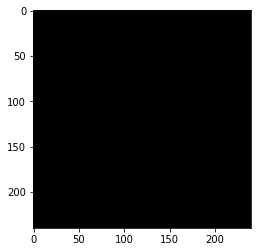

In [22]:
plt.imshow(pred[80], cmap='gray')

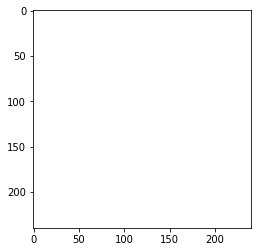

In [23]:
from matplotlib.colors import NoNorm
predict_img = pred[80]
predict_img[predict_img > 0.5] = 1
predict_img[predict_img <= 0.5] = 0

plt.imshow(predict_img, cmap='gray', norm=NoNorm())

In [24]:
model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, validation_data=validation_data)

Epoch 1/100


2021-11-24 20:10:56.442350: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.35GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


10/10 [==============================] - 15s 899ms/step - loss: 10.8724 - iou_score: 0.3302 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 2/100
10/10 [==============================] - 2s 213ms/step - loss: 10.8724 - iou_score: 0.3316 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 3/100
10/10 [==============================] - 2s 214ms/step - loss: 10.8724 - iou_score: 0.3302 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 4/100
10/10 [==============================] - 2s 213ms/step - loss: 10.8724 - iou_score: 0.3300 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 5/100
10/10 [==============================] - 2s 216ms/step - loss: 10.8724 - iou_score: 0.3304 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 6/100
10/10 [==============================] - 2s 217ms/step - loss: 10.8724 - iou_score: 0.3304 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 7/100
10/10 [==============================] - 2s 214ms/step - loss: 10.8724 - iou_score: 0.3324 - val_loss: 11.8336 - val_

10/10 [==============================] - 2s 222ms/step - loss: 10.8724 - iou_score: 0.3316 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 57/100
10/10 [==============================] - 2s 216ms/step - loss: 10.8724 - iou_score: 0.3294 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 58/100
10/10 [==============================] - 2s 218ms/step - loss: 10.8724 - iou_score: 0.3309 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 59/100
10/10 [==============================] - 2s 215ms/step - loss: 10.8724 - iou_score: 0.3330 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 60/100
10/10 [==============================] - 2s 221ms/step - loss: 10.8724 - iou_score: 0.3286 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 61/100
10/10 [==============================] - 2s 218ms/step - loss: 10.8724 - iou_score: 0.3312 - val_loss: 11.8336 - val_iou_score: 0.2614
Epoch 62/100
10/10 [==============================] - 2s 214ms/step - loss: 10.8724 - iou_score: 0.3282 - val_loss: 11.8336 -

In [25]:
def plot_result(img_pred, original, valid):
    plt.figure(figsize=(10, 10))
    n = 1
    for index, img in enumerate(img_pred):
        for i in range(3):
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.subplot(img_pred.shape[0] , 3, n)
            if i == 0:
                original_img = cv2.resize(original[index], img_size)
                plt.imshow(original_img)
                plt.xlabel("Original ")
            if i == 1:
                result_img = cv2.resize(img, img_size)
                plt.imshow(result_img, cmap=plt.cm.binary)
                plt.xlabel("Result", )
            if i == 2:
                valid_img = cv2.resize(valid[index], img_size)
                plt.imshow(valid_img, cmap=plt.cm.binary)
                plt.xlabel("Expected")
            n += 1


../dataset/segmentation/healthy/ found 30 img to load

[0]:|||||||||||||||||||||||||||||
../dataset/segmentation/annotation/healthy/ found 30 img to load

[0]:|||||||||||||||||||||||||||||

2021-11-24 20:16:39.621944: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.72GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-11-24 20:16:39.622017: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.98GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-11-24 20:16:39.723667: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.99GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-11-24 20:16:41.218056: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Alloc

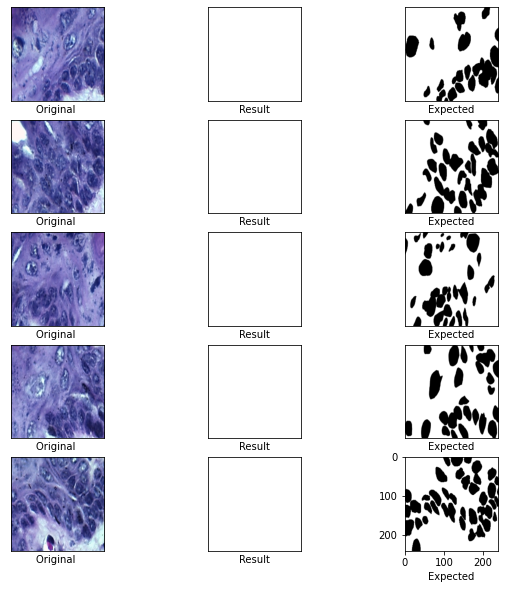

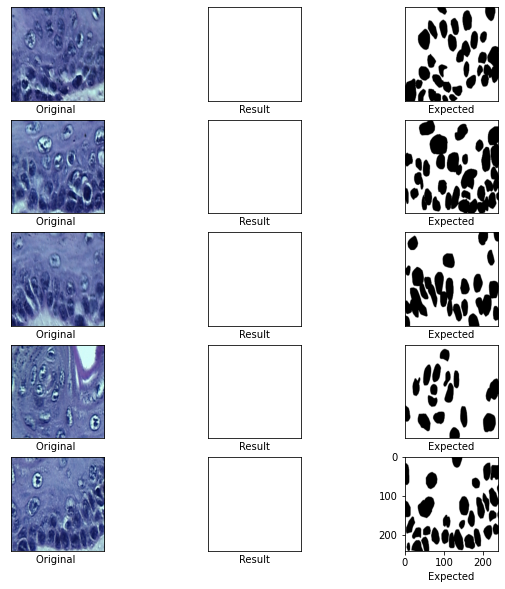

In [26]:
path_healthy_img = '../dataset/segmentation/healthy/'
path_healthy_val = '../dataset/segmentation/annotation/healthy/'

healthy_img = load_all_imgs(path_healthy_img, img_size, 1)
healthy_val = load_all_imgs(path_healthy_val, img_size, 0)
healthy_pred = model.predict(healthy_img)
# ----- Primeiras 5 Imagens -----
plot_result(healthy_pred[:5], healthy_img[:5], healthy_val[:5])
# ----- Ultimas 5 Imagens -----
plot_result(healthy_pred[-5:], healthy_img[-5:], healthy_val[-5:])